<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.622972  56.254254  94.177280  ...  237.746425  237.050026  0.696400
      1.0    23.928661  56.118126  39.600974  ...  130.739941  129.433899  1.306042
      2.0    70.172034  58.762111  70.367359  ...  209.453553  209.251799  0.201754
      3.0    53.321232  33.751511  70.024224  ...  167.118540  166.897162  0.221378
      4.0    22.552355  36.612184  37.128557  ...  103.860766  105.982615 -2.121850
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  35.164075  49.803791  26.786845  ...  122.730659  121.847378  0.883282
      246.0  64.334034  86.469683  86.585752  ...  248.372663  247.313491  1.059172
      247.0  35.430741  29.619601  90.602628  ...  166.764221  165.861090  0.903131
      248.0  39.936208  76.706634  27.137443  ...  153.838064  153.766412  0.071652
      249.0  86.533429  41.873960  55.947420  ...  193.229168  194.344693 -1.115525

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.622972  56.254254  94.177280  ...  237.746425  237.050026  0.696400
      1.0    23.928661  56.118126  39.600974  ...  130.739941  129.433899  1.306042
      2.0    70.172034  58.762111  70.367359  ...  209.453553  209.251799  0.201754
      3.0    53.321232  33.751511  70.024224  ...  167.118540  166.897162  0.221378
      4.0    22.552355  36.612184  37.128557  ...  103.860766  105.982615 -2.121850
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  35.164075  49.803791  26.786845  ...  122.730659  121.847378  0.883282
      246.0  64.334034  86.469683  86.585752  ...  248.372663  247.313491  1.059172
      247.0  35.430741  29.619601  90.602628  ...  166.764221  165.861090  0.903131
      248.0  39.936208  76.706634  27.137443  ...  153.838064  153.766412  0.071652
      249.0  86.533429  41.873960  55.947420  ...  193.229168  194.344693 -1.115525

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.622972  56.254254  94.177280  ...  237.746425  237.050026  0.696400
      1.0    23.928661  56.118126  39.600974  ...  130.739941  129.433899  1.306042
      2.0    70.172034  58.762111  70.367359  ...  209.453553  209.251799  0.201754
      3.0    53.321232  33.751511  70.024224  ...  167.118540  166.897162  0.221378
      4.0    22.552355  36.612184  37.128557  ...  103.860766  105.982615 -2.121850
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  35.164075  49.803791  26.786845  ...  122.730659  121.847378  0.883282
      246.0  64.334034  86.469683  86.585752  ...  248.372663  247.313491  1.059172
      247.0  35.430741  29.619601  90.602628  ...  166.764221  165.861090  0.903131
      248.0  39.936208  76.706634  27.137443  ...  153.838064  153.766412  0.071652
      249.0  86.533429  41.873960  55.947420  ...  193.229168  194.344693 -1.115525

[250000 rows x 7 columns]

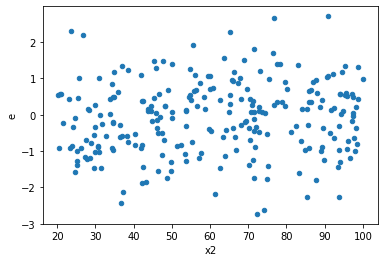

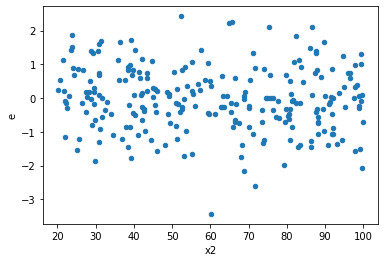

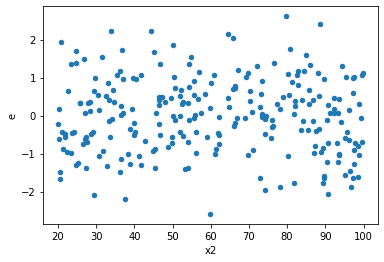

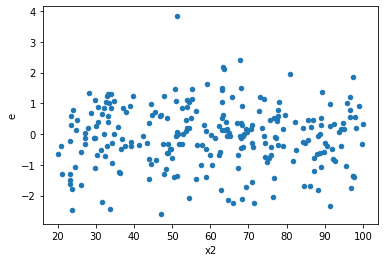

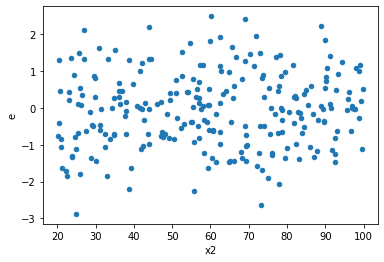

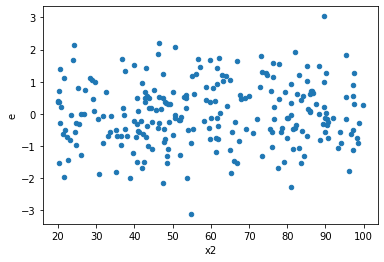

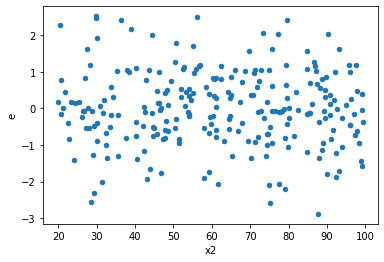

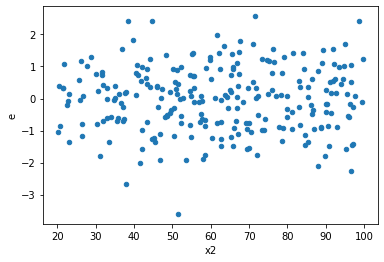

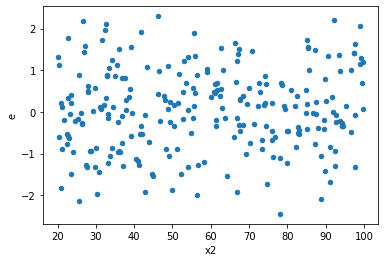

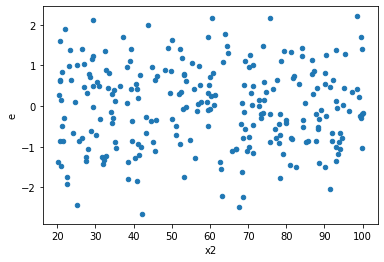

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,125.0,119.0,111.78259078509387,123.68314646547206,0.894260726280751,1.039354171978757,1.1622496006298437,0.4087806682086004,0.7956096658956998,0.2043903341043002,Reject001=1 : Homoscedasticity
1.0,123.0,121.0,105.96608567135078,109.790965709143,0.8615128916369982,0.9073633529681239,1.053220865034304,0.7754603087746688,0.6122698456126656,0.3877301543873344,Reject001=1 : Homoscedasticity
3.0,112.0,132.0,103.53922284306715,136.26917259306072,0.9244573468130995,1.0323422166140963,1.1167007544186982,0.5405254227204075,0.7297372886397963,0.27026271136020374,Reject001=1 : Homoscedasticity
7.0,103.0,141.0,101.85372897624133,149.1266738971267,0.9888711551091391,1.0576359850860049,1.0695387155562004,0.7068278388099893,0.6465860805950053,0.35341391940499467,Reject001=1 : Homoscedasticity
9.0,122.0,122.0,110.89909344267552,114.66410415936694,0.9090089626448813,0.9398697062243192,1.033949878216431,0.8540133210945795,0.5729933394527102,0.42700666054728975,Reject001=1 : Homoscedasticity
10.0,129.0,115.0,129.84323507577597,126.57787450597695,1.006536706013767,1.1006771696171909,1.0935290914290174,0.6255601021313806,0.6872199489343097,0.3127800510656903,Reject001=1 : Homoscedasticity
11.0,124.0,120.0,120.47864913472384,124.90181920623328,0.9716020091509987,1.0408484933852773,1.071270420997572,0.7052214726429127,0.6473892636785437,0.35261073632145634,Reject001=1 : Homoscedasticity
12.0,129.0,115.0,98.87140752654862,125.9980577461828,0.7664450195856483,1.0956352847494155,1.4295027780880258,0.051074953223661845,0.9744625233881691,0.025537476611830923,Reject001=1 : Homoscedasticity
13.0,122.0,122.0,90.77162265797371,128.866156627649,0.7440296939178173,1.0562799723577787,1.419674484758469,0.05404933232645126,0.9729753338367744,0.02702466616322563,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,125.0,119.0,111.78259078509387,123.68314646547206,0.894260726280751,1.039354171978757,1.1622496006298437,0.4087806682086004,Reject001=1 : Homoscedasticity
1.0,123.0,121.0,105.96608567135078,109.790965709143,0.8615128916369982,0.9073633529681239,1.053220865034304,0.7754603087746688,Reject001=1 : Homoscedasticity
2.0,120.0,124.0,119.33693277949327,114.87187141281733,0.9944744398291105,0.9263860597807849,0.9315333030982417,0.6967397401722357,Reject001=1 : Homoscedasticity
3.0,112.0,132.0,103.53922284306715,136.26917259306072,0.9244573468130995,1.0323422166140963,1.1167007544186982,0.5405254227204075,Reject001=1 : Homoscedasticity
4.0,127.0,117.0,136.0299100763456,106.47778271753516,1.0711016541444536,0.910066518953292,0.8496546666994097,0.3680306284698298,Reject001=1 : Homoscedasticity
5.0,126.0,118.0,128.14874222478798,104.67885282960853,1.0170535097205395,0.8871089222848181,0.872234266738407,0.45010735472491875,Reject001=1 : Homoscedasticity
6.0,117.0,127.0,135.31760081795085,118.61824860203751,1.1565606907517167,0.9340019574963584,0.8075684786496553,0.24134134186353784,Reject001=1 : Homoscedasticity
7.0,103.0,141.0,101.85372897624133,149.1266738971267,0.9888711551091391,1.0576359850860049,1.0695387155562004,0.7068278388099893,Reject001=1 : Homoscedasticity
8.0,124.0,120.0,132.6744589782701,103.98509761724793,1.069955314340888,0.8665424801437328,0.8098866079071151,0.24500628880076186,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      992
Reject001=0 : Heteroscedasticity      8
Name: Result_test, dtype: int64